In [1]:
import numpy as np 

In [2]:
import pandas as pd 

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns 

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
from sklearn.model_selection import train_test_split 

In [7]:
from sklearn.linear_model import LinearRegression 
model=LinearRegression()

In [83]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)

In [9]:
from sklearn import metrics 

In [10]:
house=pd.read_csv("Kc_house_data.csv",encoding="ISO-8859-1")
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [11]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [12]:
house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [13]:
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# data viz

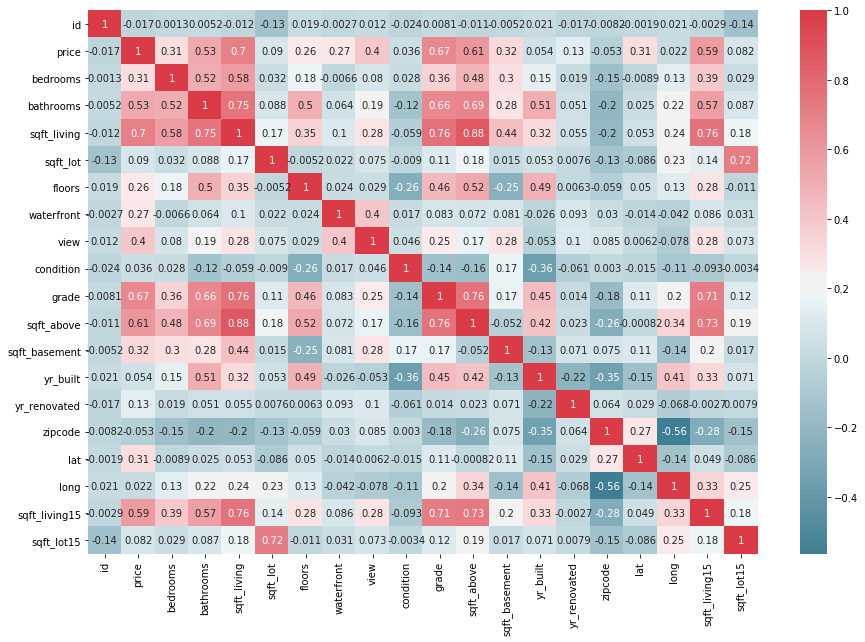

In [14]:
def correlation_heatmap(house):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(house.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(house)

the heat map is showing us the correlation between the columns but it is not so clear so we'll see it further more in a table 

In [15]:
house.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


focusing on the second row which is the price we'll see its correlation with theother feature ,bare in mind that correlation varies between -1 an 1 and a feature is useless when it is close to 0. as we can see , the useless features are :id (-.016),year built(0.05), zipcode (0.05),long(0.02)and sqft_lot15 (square footage of land of the 15 closest neighbors)(0.08). we will drop those colmns and work with our new data from now on


In [16]:
house=house.drop(["long","id","date","sqft_lot15","yr_built","zipcode"],axis=1,)
house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,lat,sqft_living15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,0,47.5112,1340
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1991,47.7210,1690
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,0,47.7379,2720
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,0,47.5208,1360
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,0,47.6168,1800


In [17]:
house.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,lat,sqft_living15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.126434,0.307003,0.585379
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.018841,-0.008931,0.391638
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.050739,0.024573,0.568634
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.055363,0.052529,0.756420
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.007644,-0.085683,0.144608
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.006338,0.049614,0.279885
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,0.092885,-0.014274,0.086463
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,0.103917,0.006157,0.280439
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.060618,-0.014941,-0.092824
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.014414,0.114084,0.713202


all the rest of the columns are important and super useful as we can see from the first row of the table above and we'll see that more in the following plots 

# linear regression

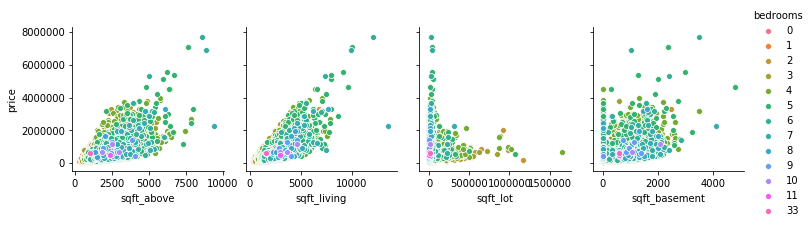

In [18]:
sns.pairplot(house, 
             x_vars=["sqft_above", "sqft_living", "sqft_lot", "sqft_basement"], 
             y_vars=["price"],
             hue = "bedrooms"
             )

we took a bunch of features and plotted them to see which one we can use for the linear regression and from the scatter plots , we'll be using sqft_living because it has a linear patter but we'll see it independantly in the following plot 

(array([-1000000.,        0.,  1000000.,  2000000.,  3000000.,  4000000.,
         5000000.,  6000000.,  7000000.,  8000000.,  9000000.]),
 <a list of 11 Text xticklabel objects>)

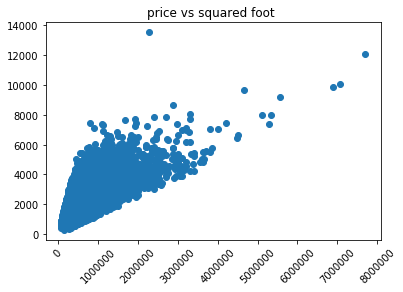

In [19]:

plt.scatter(house["price"],house["sqft_living"])
plt.title("price vs squared foot ")
plt.xticks (rotation=45)

In [20]:
x=np.array(house[["sqft_living"]])
y=np.array(house[["price"]])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)
x_train=x_train.reshape(-1,1)
y_train=y_train.reshape(-1,1)


In [21]:
len(x_train)

17290

In [22]:
len(x_test)

4323

In [23]:
model.fit(x_train,y_train)
predicted=model.predict(x_test)

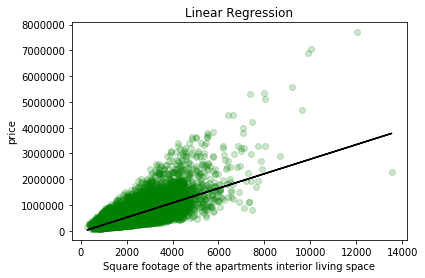

In [24]:
plt.scatter(x,y,color="green",alpha=.2)
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("Square footage of the apartments interior living space")
plt.plot(x,model.predict(x),color="k")
plt.show()

In [25]:
print("MSE:",metrics.mean_squared_error(y_test,predicted))
print("R squared:",metrics.r2_score(y_test,predicted))

MSE: 64179676631.68388
R squared: 0.4879814110728805


In [26]:
#coefficient a
model.coef_

array([[282.53959684]])

In [27]:
#coefficient b 
model.intercept_

array([-46813.81594244])

intercept_ holds the bias 𝑏₀, while now .coef_ is an array containing a₁ . In this example, the intercept is approximately -46813.82 and the coefficient is nearly 282.54 Therefore,

ŷ= -46813.82 + 282.54 * x1.


we notice that we have a percentage of accuracy of 48.79% which is kind of low , so we'll see if we can improve it through other methods  

# multi-linear regression 

we're trying grade and sqft_above and bedrooms to see if they have a linear pattern and if we can use them along with sqft_living in the multi-linear regression 

Text(0, 0.5, 'Price')

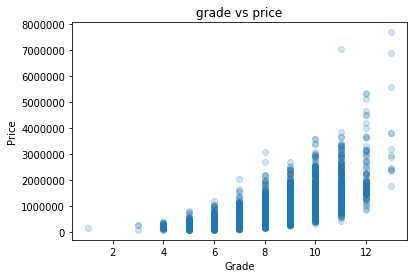

In [28]:
plt.scatter(house.grade,house.price,alpha=0.2)
plt.title("grade vs price")
plt.xlabel('Grade')
plt.ylabel('Price')

Text(0, 0.5, 'Price ')

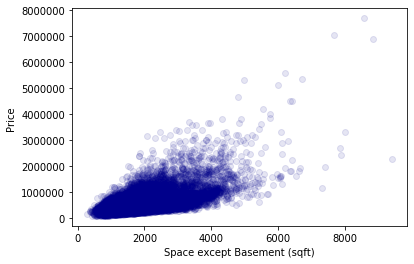

In [29]:
# check train data scatter plot
plt.scatter(house.sqft_above,house.price, color='darkblue', alpha=.1)
plt.xlabel('Space except Basement (sqft)')
plt.ylabel('Price ')

j'ai essayé de faire multi-linear regression de cette façon(entrée suivante)mais ça marche pas .et j'ai fait beaucoup de recherches en tentative de la corriger mais malheureusement j'arrive pas à le faire . j'éspère que vous m'aiderez à comprendre ma faute et à la corriger 

In [85]:
x=np.array(['bedrooms','grade','sqft_living','sqft_above'])
y=np.array(house['price'])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)
x_train=x_train.reshape(-1,1)
y_train=y_train.reshape(-1,1)
x_test=x_test.reshape(-1,1)
y_test=y_test.reshape(-1,1)
model.fit(x_train,y_train)

ValueError: Found input variables with inconsistent numbers of samples: [4, 21613]

comme j'avais besoin de cette partie pour faire une comparaison à la fin , j'ai trouvé ce code sur google et je l'ai bien compris mais c pas mon propre effort pour etre honnete 

In [82]:

features1=['bedrooms','grade','sqft_living','sqft_above']
train_data,test_data=train_test_split(house,train_size=0.8,random_state=3)

model.fit(train_data[features1],train_data['price'])
pred=model.predict(test_data[features1])
print('complex_model 1')
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('mean squared error(MSE)', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(model.score(train_data[features1],train_data['price']),3))
print('R squared training', round(model.score(test_data[features1],test_data['price']),3))
print('Intercept: ', model.intercept_)
print('Coefficient:', model.coef_)

complex_model 1
mean squared error(MSE) 448910.58
R squared training 0.548
R squared training 0.555
Intercept:  -523645.7841468436
Coefficient: [-4.33050242e+04  1.03455986e+05  2.73023590e+02 -8.38875593e+01]


our R squared is now nearly equal to 55% which is higher than the one in the simple linear regression , which means it gives us better predictions because obviously we need more than one feature to predict the house's price 
our intercept (b)and coefficients which are 4 equal to the number of the features we used , have remarkably changed as well 

# polynomial regression 

In [90]:


model.fit(train_data[features1],train_data['price'])
x_train_poly=poly.fit_transform(train_data[features1])
model.fit(x_train_poly,train_data['price'])
x_test_poly=poly.fit_transform(test_data[features1])

predicted=model.predict(x_test_poly)
print("MSE:",metrics.mean_squared_error(test_data['price'],predicted))
print("R squared:",metrics.r2_score(test_data['price'],predicted))

MSE: 49268491122.54775
R squared: 0.6161709542564413


our accuracy percentage is now eqaul to  61.61 % which is higher than the other previous regressions multiple and linear .
We can conclude now that the polynomial regression is the most precise and it is the best since in our case : 61.61>55>48.47
even though it is the best among all the above, still it is not the most effective of all , since 61% is still far from 100% or let's be realistic 98%